[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ducis28/sg-dlfs4/blob/main/dlfs4_ch03.ipynb)

# 『ゼロから作るDeep Learning ❹ 強化学習編』

https://github.com/oreilly-japan/deep-learning-from-scratch-4

## 第3章 ベルマン方程式

状態価値関数 $v_\pi(s)$，行動価値関数 $q_\pi(s,a)$ やベルマン方程式について学ぶ。

状態価値関数は，単に価値関数とよばれることがある。

行動価値関数は，慣習として Q 関数とよばれることがある。


### 3.1 ベルマン方程式の導出

時刻 $t$ における収益（リターン）を以下のように定義する。

$$
G_t = R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \cdots
$$

ただし，$R_t$ は時刻 $t$ に得られる報酬（reward）であり，$\gamma$ は割引率（discount factor, $0<\gamma<1$）である。

これを変形すると

$$
G_t = R_t + \gamma G_{t+1}
$$

方策 $\pi$ に対する状態 $s$ の価値を **状態価値関数** $v_\pi(s)$ によって表すと，

$$
\newcommand{\UL}[2]{\color{#1}{\underline{\color{black}{#2}}}}
$$

$$
\begin{align*}
v_\pi(s)
&= \mathbb{E}_\pi\left[ G_t \mid S_t = s \right]
\\
&= \UL{#FF4B00}{\mathbb{E}_\pi\left[ R_t \mid S_t = s \right]}
   + \gamma \cdot \UL{#005AFF}{\mathbb{E}_\pi\left[ G_{t+1} \mid S_t = s \right]}
\end{align*}
$$

*   エージェントの方策 $\pi(a \mid s)$
*   環境の状態遷移確率 $p(s' \mid s, a)$
*   環境の報酬 $r(s,a,s')$

を用いると，

$$
\UL{#FF4B00}{\mathbb{E}_\pi\left[ R_t \mid S_t = s \right]}
=
\sum_{a} \sum_{s'} \pi(a \mid s) \cdot p(s' \mid s, a) \cdot r(s,a,s')
$$

である。

また，

$$
\begin{align*}
\UL{#005AFF}{\mathbb{E}_\pi\left[ G_{t+1} \mid S_t = s \right]}
&=
\sum_{s'} P\left[ S_{t+1} = s' \mid S_t = s \right]
\cdot
\mathbb{E}_\pi\left[ G_{t+1} \mid S_t = s, S_{t+1} = s' \right]
\\
&=
\sum_{s'} P\left[ S_{t+1} = s' \mid S_t = s \right]
\cdot
\mathbb{E}_\pi\left[ G_{t+1} \mid S_{t+1} = s' \right]
\\
&=
\sum_{s'} \sum_{a}
\pi(a \mid s)
\cdot p(s' \mid s, a)
\cdot
v_\pi(s')
\end{align*}
$$

である。

これらをまとめると，次の **ベルマン方程式** （Bellman equation）が得られる。

$$
v_\pi(s) = \sum_{a,s'} \pi(a \mid s) \cdot p(s' \mid s,a) \cdot \left\{ r(s,a,s') + \gamma \cdot v_\pi(s') \right\}
$$

特に，状態遷移が決定論的である場合は，関数 f が存在して

$$
p(s'\mid s,a) = \begin{cases} 1 & \text{$s'=f(s,a)$のとき} \\ 0 & \text{それ以外} \end{cases}
$$

が成り立つ。

このとき，ベルマン方程式は以下のように変形できる。

$$
v_\pi(s) = \sum_{a} \pi(a \mid s) \cdot \left\{ r(s,a,s') + \gamma \cdot v_\pi(s') \right\}
\\
\text{ただし $s'=f(s,a)$}
$$

### 3.2 ベルマン方程式の例

2マスのグリッドワールドのインスタンスにおいて，状態価値関数を求めてみる。

| 状態 $s$ | 行動 $a$ | → | &nbsp;&nbsp; 確率 &nbsp;&nbsp; | 次状態 $s'$ | &nbsp;&nbsp; 報酬 &nbsp;&nbsp; |
|---|---||:---:|:---:|:---:|
|L1|Left |→|$p$  |L1|$-1$|
|L1|Right|→|$1-p$|L2|$+1$|
|L2|Left |→|$1-q$|L1| $0$|
|L2|Right|→|$q$  |L2|$-1$|


すべての場合についてベルマン方程式を書き下してみよう。

$$
\begin{align*}
v_\pi(\text{L1})
&= \sum_{a} \pi(a\mid\text{L1}) \cdot \left\{ r(\text{L1},a,\text{L1}) + \gamma \cdot v_\pi(\text{L1}) \right\}
\\
&= \Bigl\{
  \pi(\text{Left}\mid\text{L1}) \cdot
    \left\{
      r(\text{L1},\text{Left},\text{L1}) + \gamma \cdot v_\pi(\text{L1})
    \right\}
\\
&\quad\quad
  +
  \pi(\text{Right}\mid\text{L1}) \cdot
    \left\{
      r(\text{L1},\text{Right},\text{L1}) + \gamma \cdot v_\pi(\text{L1})
    \right\}
  \Bigr\}
\\
&= p \cdot \{ -1 + \gamma \cdot v_\pi(\text{L1}) \}
   + (1-p) \cdot \{ +1 + \gamma \cdot v_\pi(\text{L2}) \}
\\
v_\pi(\text{L2})
&= \sum_{a} \pi(\text{Left}\mid\text{L2}) \cdot \left\{ r(\text{L2},\text{Left},\text{L1}) + \gamma \cdot v_\pi(\text{L1}) \right\}
\\
&= (1-q) \cdot \{ 0 + \gamma \cdot v_\pi(\text{L1}) \}
   + q \cdot \{ -1 + \gamma \cdot v_\pi(\text{L2}) \}
\end{align*}
$$

$v_\pi(\text{L1})$, $v_\pi(\text{L2})$ をそれぞれ $v_1,v_2$ と書くことにして，上記の連立方程式を書き直すと:

$$
\Bigl\{
\begin{align*}
v_1 &= 1 - 2p + p \gamma v_1 + (1-p) \gamma v_2
\\
v_2 &= -q + (1-q) \gamma v_1 + q \gamma v_2
\end{align*}
$$

$$
\begin{bmatrix}
1-p\gamma & -(1-p)\gamma
\\
-(1-q)\gamma & 1 - q \gamma
\end{bmatrix}
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix}
=
\begin{bmatrix} 1-2p \\ -q \end{bmatrix}
$$

これを解くと

$$
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix}
=
\frac{1}{\{1 - (p+q-1) \gamma\}(1 - \gamma)}
\begin{bmatrix}
3pq\gamma-2p-2q\gamma+1
\\
3pq\gamma-2p\gamma-q\gamma-q+\gamma
\end{bmatrix}
$$


たとえば，$p=q=\frac{1}{2}$ のとき，

$$
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix}
=
-\frac{1}{4(1 - \gamma)}
\begin{bmatrix}
\gamma
\\
2-\gamma
\end{bmatrix}
$$

さらに，$\gamma=0.9$ なら

$$
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix}
=
\begin{bmatrix}
-2.25
\\
-2.75
\end{bmatrix}
$$

### 3.3 行動価値関数とベルマン方程式

ある状態においてある行動をとったときに得られる収益を **行動価値関数**（action-value function）とよぶ。つまり，

$$
q_\pi(s,a) = \mathbb{E}_\pi\left[ G_t \mid S_t = s, A_t = a \right]
$$

状態 $s$ において方策 $\pi$ にもとづいて行動すると，状態価値関数 $v_\pi(s)$ を行動価値関数 $q_\pi(s,a)$ を用いて以下のように表すことができる。

$$
v_\pi(s) = \sum_a \pi(a\mid s) \cdot q_\pi(s,a)
$$

行動価値関数を用いて，Q 関数バージョンのベルマン方程式を導出することができる。

$$
\begin{align*}
q_\pi(s,a)
&= \mathbb{E}_\pi\left[ G_t \mid S_t = s, A_t = a \right]
\\
&= \sum_{s'} p(s'\mid s,a) \cdot
   \mathbb{E}_\pi\left[
     G_t \mid S_t = s, A_t = a, S_{t+1} = s'
   \right]
\\
&= \sum_{s'} p(s'\mid s,a) \cdot
   \mathbb{E}_\pi\left[
     R_t + \gamma G_{t+1} \mid S_t = s, A_t = a, S_{t+1} = s'
   \right]
\\
&= \sum_{s'} p(s'\mid s,a) \cdot \Bigl\{
   \mathbb{E}_\pi\left[
     R_t \mid S_t = s, A_t = a, S_{t+1} = s'
   \right]
   + \gamma
   \mathbb{E}_\pi\left[
     G_{t+1} \mid S_{t+1} = s'
   \right]
   \Bigr\}
\\
&= \sum_{s'} p(s'\mid s,a) \cdot \Bigl\{
   r(s,a,s') + \gamma \cdot v_\pi(s')
   \Bigr\}
\\
&= \sum_{s'} p(s'\mid s,a) \cdot \Bigl\{
   r(s,a,s') + \gamma \cdot \sum_{a'} \pi(a\mid s') \cdot q_\pi(s',a')
   \Bigr\}
\end{align*}
$$

### 3.4 ベルマン最適方程式

状態価値関数のベルマン方程式を再掲する。

$$
v_\pi(s) = \sum_a \pi(a \mid s) \cdot \sum_{s'} p(s' \mid s,a) \cdot \left\{ r(s,a,s') + \gamma \cdot
 v_\pi(s') \right\}
$$

最適方策を $\pi_*$ とおき，最適方策についてのベルマン方程式 $v_{\pi_*}(s)$ を $v_*(s)$ と書くことにする。

$$
v_*(s)
= \sum_a \pi_*(a \mid s) \cdot \sum_{s'} p(s' \mid s,a) \cdot \left\{ r(s,a,s') + \gamma \cdot
 v_*(s') \right\}
$$

方策 $\pi_\ast$ は最適，つまり $v_\ast(s)$ を最大化する方策であることから，

$$
v_*(s)
= \max_a \sum_{s'} p(s' \mid s,a) \cdot \left\{ r(s,a,s') + \gamma \cdot
 v_*(s') \right\}
$$

これを状態価値関数の **ベルマン最適方程式** とよぶ。

同様にして，Q 関数のベルマン最適方程式を導出することもできる。

$$
\begin{align*}
q_*(s,a)
&= \sum_{s'} p(s'\mid s,a) \cdot \Bigl\{
   r(s,a,s') + \gamma \cdot \sum_{a'} \pi_*(a\mid s') \cdot q_*(s',a')
   \Bigr\}
\\
&= \sum_{s'} p(s'\mid s,a) \cdot \Bigl\{
   r(s,a,s') + \gamma \cdot \max_{a'} q_*(s',a')
   \Bigr\}
\end{align*}
$$

さらに，状態遷移 $p(s'\mid s,a)$ が決定論的であるとき，$s'=f(s,a)$ として， 2 つの最適方程式は以下のようになる。

$$
\begin{align*}
v_*(s)
&= \max_a \left\{ r(s,a,s') + \gamma \cdot
 v_*(s') \right\}
\\
q_*(s,a)
&= r(s,a,s') + \gamma \cdot \max_{a'} q_*(s',a')
\end{align*}
$$

### 3.5 ベルマン最適方程式の例

状態価値関数のベルマン最適方程式を再掲する。

$$
v_*(s)
= \max_a \sum_{s'} p(s' \mid s,a) \cdot \left\{ r(s,a,s') + \gamma \cdot
 v_*(s') \right\}
$$

ふたたび 2 マスのグリッドワールドのインスタンスを考えよう。

| 状態 $s$ | 行動 $a$ | → | &nbsp;&nbsp; 確率 &nbsp;&nbsp; | 次状態 $s'$ | &nbsp;&nbsp; 報酬 &nbsp;&nbsp; |
|---|---||:---:|:---:|:---:|
|L1|Left |→|$p$  |L1|$-1$|
|L1|Right|→|$1-p$|L2|$+1$|
|L2|Left |→|$1-q$|L1| $0$|
|L2|Right|→|$q$  |L2|$-1$|


この場合，状態価値関数の最適方程式は

$$
\begin{align*}
v_*(\text{L1})
&= \max \left\{ \begin{array}{l}
     \displaystyle -1 + \gamma \cdot
 v_*(\text{L1}) \\
     \displaystyle +1 + \gamma \cdot
 v_*(\text{L2})
   \end{array} \right.
\\
v_*(\text{L2})
&= \max \left\{ \begin{array}{l}
     \displaystyle 0 + \gamma \cdot
 v_*(\text{L1}) \\
     \displaystyle -1 + \gamma \cdot
 v_*(\text{L2})
   \end{array} \right.
\end{align*}
$$

$0 < \gamma < 1$ に注意してこれを解くと（たとえば max を不等式に置き換えて必要条件を満たす領域を図示すると分かりやすい），

$$
\left\{
\begin{align*}
v_*(\text{L1}) &= \frac{1}{1-\gamma^2}
\\
v_*(\text{L2}) &= \frac{\gamma}{1-\gamma^2}
\end{align*}
\right.
$$

特に，$\gamma=0.9$ のとき，

$$
\left\{
\begin{align*}
v_*(\text{L1}) &= \frac{1}{1-0.9^2} = 5.2631\cdots
\\
v_*(\text{L2}) &= \frac{0.9}{1-0.9^2} = 4.7368\cdots
\end{align*}
\right.
$$

次に，最適方策を考える。

最適行動価値関数 $q_*(s,a)$ が存在するならば，最適な行動を次のように決定論的に選ぶことができる。

$$
\mu_*(s) = \mathop{\rm argmax}_a\;q_*(s,a)
$$

最適行動価値関数が満たすべき式を再掲する。
$v_*(s)$ が計算済みであることをふまえて， $v_*(s)$ を用いるバージョンを選んだ。

$$
q_*(s,a)
= \sum_{s'} p(s'\mid s,a) \cdot \Bigl\{
   r(s,a,s') + \gamma \cdot v_*(s')
   \Bigr\}
$$

さらに，状態遷移が決定論的にふるまうのであれば $s'=f(s,a)$ について

$$
q_*(s,a)
= r(s,a,s') + \gamma \cdot v_*(s')
$$

上式から，以下を得る。

$$
\mu_*(s)
= \mathop{\rm argmax}_a
  \left\{
    r(s,a,s') + \gamma \cdot v_*(s')
  \right\}
$$


この式をグリッドワールドの問題に適用する。

$$
\begin{align*}
q_*(\text{L1},\text{Left})
&= r(\text{L1},\text{Left},\text{L1}) + \gamma \cdot v_*(\text{L1})
 = -1 + \gamma \cdot \frac{1}{1-\gamma^2}
 = \frac{\gamma^2+\gamma-1}{1-\gamma^2}
\\
q_*(\text{L1},\text{Right})
&= r(\text{L1},\text{Right},\text{L2}) + \gamma \cdot v_*(\text{L2})
 = +1 + \gamma \cdot \frac{\gamma}{1-\gamma^2}
 = \frac{1}{1-\gamma^2}
\\
q_*(\text{L2},\text{Left})
&= r(\text{L2},\text{Left},\text{L1}) + \gamma \cdot v_*(\text{L1})
 = 0 + \gamma \cdot \frac{1}{1-\gamma^2}
 = \frac{\gamma}{1-\gamma^2}
\\
q_*(\text{L2},\text{Right})
&= r(\text{L2},\text{Right},\text{L2}) + \gamma \cdot v_*(\text{L2})
 = -1 + \gamma \cdot \frac{\gamma}{1-\gamma^2}
 = \frac{2\gamma^2-1}{1-\gamma^2}
\end{align*}
$$

$q_*(\text{L1},\text{Left}) - q_*(\text{L1},\text{Right}) = \frac{\gamma^2+\gamma-2}{1-\gamma^2} = \frac{-(1-\gamma)(\gamma+2)}{1-\gamma^2}<0$ より

$$
\mu_*(\text{L1})
=
\mathop{\rm argmax}_a\;q_*(\text{L1},a)
=
\text{Right}
$$

同様に $q_*(\text{L2},\text{Left}) - q_*(\text{L2},\text{Right}) = \frac{-2\gamma^2+\gamma+1}{1-\gamma^2} = \frac{(1-\gamma)(2\gamma+1)}{1-\gamma^2}>0$ より

$$
\mu_*(\text{L2})
=
\mathop{\rm argmax}_a\;q_*(\text{L2},a)
=
\text{Left}
$$


### 3.6 まとめ

### 【ベルマン方程式】

$$
v_\pi(s) = \sum_{a,s'} \pi(a \mid s) \cdot p(s' \mid s,a) \cdot \left\{ r(s,a,s') + \gamma \cdot v_\pi(s') \right\}
$$

$$
q_\pi(s,a)
= \sum_{s'} p(s'\mid s,a) \cdot \Bigl\{
  r(s,a,s') + \gamma \cdot \sum_{a'} \pi(a\mid s') \cdot q_\pi(s',a')
  \Bigr\}
$$

### 【ベルマン最適方程式】

$$
v_*(s)
= \max_a \sum_{s'} p(s' \mid s,a) \cdot \left\{ r(s,a,s') + \gamma \cdot
 v_*(s') \right\}
\\
q_*(s,a)
= \sum_{s'} p(s'\mid s,a) \cdot \Bigl\{
   r(s,a,s') + \gamma \cdot \max_{a'} q_*(s',a')
   \Bigr\}
$$

### 【最適方策】

$$
\begin{align*}
\mu_*(s)
&= \mathop{\rm argmax}_a\;q_*(s,a)
\\
&= \mathop{\rm argmax}_a\sum_{s'} p(s'\mid s,a) \cdot \Bigl\{
   r(s,a,s') + \gamma \cdot v_*(s')
   \Bigr\}
\end{align*}
$$

## メモ

### 第 3.5.1 節のベルマン最適方程式の解について

書籍では，以下の方程式の解が説明なしに出てくる（「今回のような小さな問題であれば，手計算で求めることもできます。」と書いてあるのみ）。
ただし書籍では $\gamma=0.9$ としている。

$$
\begin{align*}
v_*(\text{L1})
&= \max \left\{ \begin{array}{l}
     \displaystyle -1 + \gamma \cdot
 v_*(\text{L1}) \\
     \displaystyle +1 + \gamma \cdot
 v_*(\text{L2})
   \end{array} \right.
\\
v_*(\text{L2})
&= \max \left\{ \begin{array}{l}
     \displaystyle 0 + \gamma \cdot
 v_*(\text{L1}) \\
     \displaystyle -1 + \gamma \cdot
 v_*(\text{L2})
   \end{array} \right.
\end{align*}
$$

行間を埋めるべく，導出してみよう。

まず，$v_*(\text{L1}),v_*(\text{L2})$ を $x,y$ とおく。
簡単のため，$\gamma=0.9$ に固定しておく。

$$
\begin{align*}
x
&= \max \left\{ \begin{array}{l}
     -1 + 0.9 x \\
     1 + 0.9 y
   \end{array} \right.
\\
y
&= \max \left\{ \begin{array}{l}
     \displaystyle 0.9 x \\
     \displaystyle -1 + 0.9 y
   \end{array} \right.
\end{align*}
$$

この方程式の解は，以下の不等式をすべて満たす。

$$
\left\{
\begin{align*}
x &\geq -1 + 0.9 x
\\
x &\geq 1 + 0.9 y
\\
y &\geq 0.9 x
\\
y &\geq -1 + 0.9 y
\end{align*}
\right.
$$

第2,3式から

$$
x \geq 1 + 0.9 y \geq 1 + 0.9 (0.9 x)
$$

これを解くと $x \geq \frac{1}{1-0.9^2}=5.2631\cdots$

もし $x=-1+0.9x$ ならば $x<0$ となり，$x > 5.26$ と矛盾する。したがって，$x \neq -1+0.9x$ である。

よって最適方程式の第1式は

$$
x = 1 + 0.9 y
$$

となる。

同様に，最適方程式の第1式は

$$
y = 0.9 x
$$

となる。

合わせると，

$$
\left\{
\begin{align*}
x &= 1 + 0.9 y
\\
y &= 0.9 x
\end{align*}
\right.
$$

あとは通常の連立1次方程式である。

これを解くと

$$
\left\{
\begin{align*}
x &= \frac{1}{1-0.9^2} = 5.2631\cdots
\\
y &= \frac{0.9}{1-0.9^2} = 4.7368\cdots
\end{align*}
\right.
$$

ところで，上記の連立不等式

$$
\left\{
\begin{align*}
x &\geq -1 + 0.9 x
\\
x &\geq 1 + 0.9 y
\\
y &\geq 0.9 x
\\
y &\geq -1 + 0.9 y
\end{align*}
\right.
$$

が表す領域を $xy$ 平面に図示してみよう。


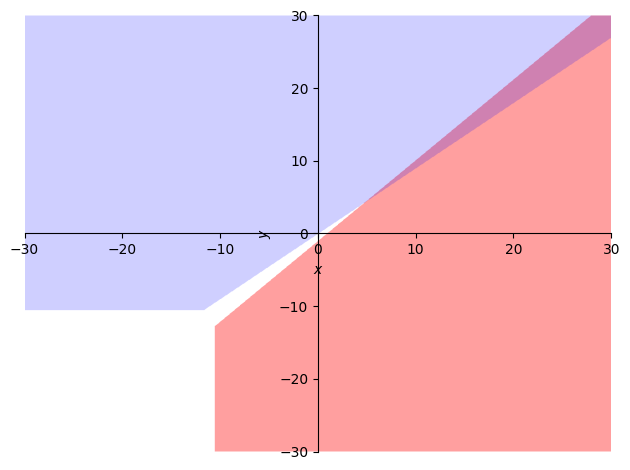

In [24]:
import sympy as sym

x, y = sym.symbols('x y')

# x = max { ... } に対応するのは，赤の領域の境界
ax1 = sym.plot_implicit((x >= -1 + 0.9 * x) & (x >= 1 + 0.9 * y), (x, -30, 30), (y, -30, 30), line_color='#ff000060', alpha=0.5, show=False)

# y = max { ... } に対応するのは，濃い青の領域の境界
ax2 = sym.plot_implicit((y >= 0.9 * x) & (y >= -1 + 0.9 * y), (x, -30, 30), (y, -30, 30), line_color='#0000ff30', alpha=0.5, show=False)

# まとめて描画する
ax1.extend(ax2)
ax1.show()

解は，赤い領域の境界と青い領域の境界との交点であり，この場合は一意に定まることが分かる。